In [1]:
import django, os, sys, time, resource, re, gc, shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from django.db.models import Count, Avg, Sum, F
from multiprocess import Pool
from functools import partial
from functools import partial
from scipy.sparse import coo_matrix, csr_matrix, find, tril
import networkx as nx
import csv

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
qid = 1457

In [2]:
run_id = 282

dtopics = DynamicTopic.objects.filter(run_id=run_id).values('title','topicdtopic__topic__year').annotate(
    ysize = Sum(F('topic__score') * F('topicdtopic__score'))
)

df = pd.DataFrame.from_dict(list(dtopics))

df = df.rename(columns = {'topicdtopic__topic__year': 'year'})

df.sort_values('ysize').head()

,title,year,ysize
1598,"{bioga, digest, anaerob}",2000,0.016333
1148,"{scenario, futur, simul}",1998,0.019819
1430,"{design, architectur, optim}",1996,0.023694
1656,"{bioga, digest, anaerob}",1996,0.027093
581,"{student, learn, univers}",2000,0.044717


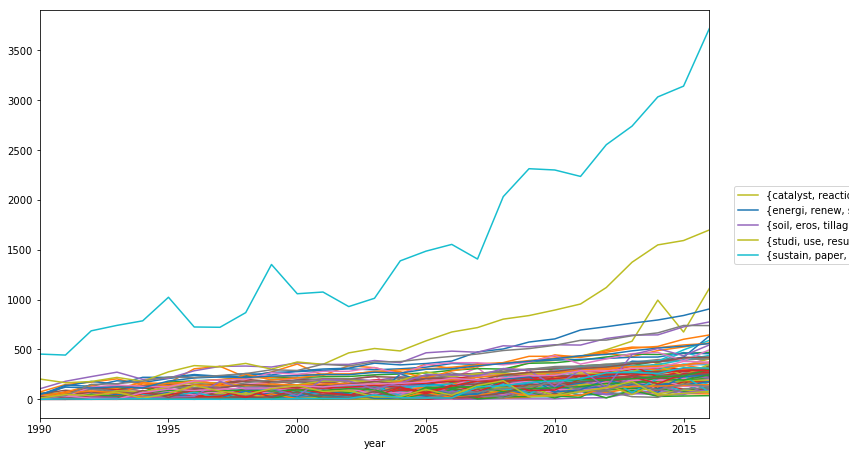

In [3]:
top2016 = df[df['year']==2016].sort_values('ysize',ascending = False).head()['title']

plt.rcParams["figure.figsize"] = [12,7.5]

pivot = df.pivot_table(
    values='ysize',
    index=['year'],
    columns=['title'],
    fill_value=0
)

fig, ax = plt.subplots()

pivot.plot(ax=ax,legend=False)
handles, labels = ax.get_legend_handles_labels()
lpos = (0.85,0.5)

fhandles = []
flabels = []

for x in range(len(labels)):
    if labels[x] in list(top2016):
        fhandles.append(handles[x])
        flabels.append(labels[x])

fig.legend(fhandles, flabels, bbox_to_anchor=lpos, loc=2, borderaxespad=.0,)


plt.show()

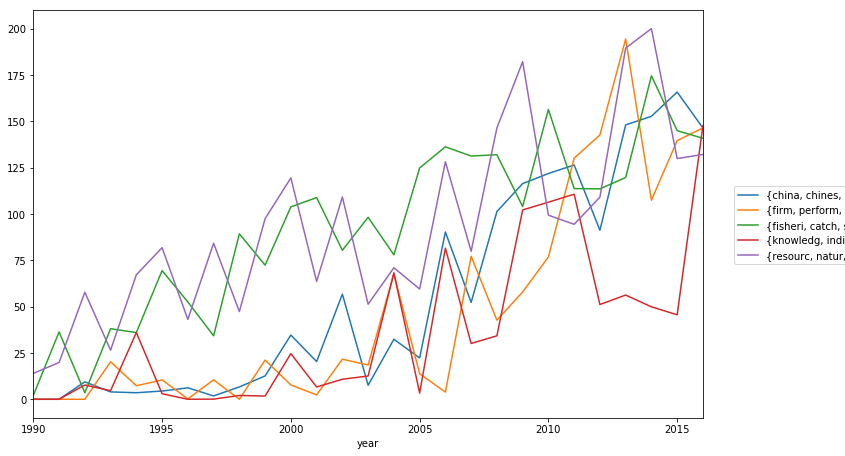

In [4]:
bot2016 = df[df['year']==2016].sort_values('ysize',ascending = True).head(20).tail(5)['title']

pdf = df[df['title'].isin(list(bot2016))]

pivot = pdf.pivot_table(
    values='ysize',
    index=['year'],
    columns=['title'],
    fill_value=0
)

fig, ax = plt.subplots()

pivot.plot(ax=ax,legend=False)
handles, labels = ax.get_legend_handles_labels()
lpos = (0.85,0.5)

fig.legend(handles, labels, bbox_to_anchor=lpos, loc=2, borderaxespad=.0,)


plt.show()


In [5]:
ydf = df.sort_values('year').set_index('year')


ydf['absgrowth'] = ydf.ysize - ydf.groupby('title').ysize.shift(1)#/ df.ysize
ydf['pgrowth'] = (ydf.ysize - ydf.groupby('title').ysize.shift(1)) / ydf.groupby('title').ysize.shift(1) * 100

ydf['absgrowth_5'] = ydf.ysize - ydf.groupby('title').ysize.shift(1)#/ df.ysize
ydf['pgrowth_5'] = (ydf.ysize - ydf.groupby('title').ysize.shift(1)) / ydf.groupby('title').ysize.shift(1) * 100

ydf[ydf['title']=='{decis, make, support}'].head()


,title,ysize,absgrowth,pgrowth,absgrowth_5,pgrowth_5
year,,,,,,


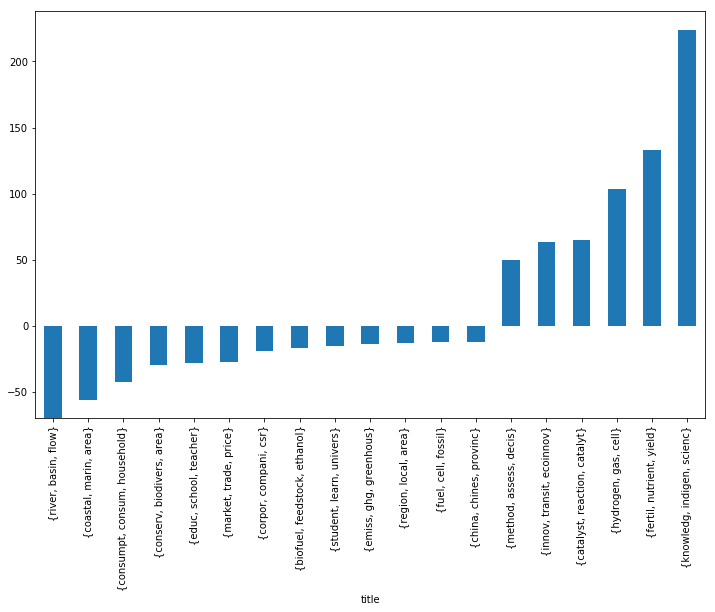

In [11]:
var = 'pgrowth_5'

pdf = ydf[ydf.index==2016].sort_values(var)

pdf = pdf[(pdf[var] > 50) | (pdf[var] < -10)]

pdf = pdf.set_index('title')

pdf[var].plot.bar()

plt.show()